In [5]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import pywt
import cv2

In [6]:
ARG_SOURCE_PATH='/hdd/data/radioterapia/ciolaplata'
# example image to extract features from
image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.104687111612620525338811872261145275128.jpeg' # 1 contour
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.413026936412366497424912997123899479271.jpeg' # 1 contour
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.149022879910701913634657645393318300150.jpeg' # 3 contours with thres = 25, 2 with thres = 20
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.68178121113821334525403915874018401462.jpeg' # 4 contours with thres = 25, 1 with thres = 20
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.76296562210273102234514513081279675861.jpeg' # 3 contours with thres = 25, 1 also with thres = 20
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.416170821113456993519232191293830059931.jpeg'

# images with large number of contours computed with threshold = 25
# image_filename = '2018-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.74512815511852542732408311143041074432.jpeg'
# image_filename = '2018-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.62640114011543701236144234712559997173.jpeg'
# image_filename = '2018-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.141504918511005072804737212242987163148.jpeg'
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.267686204211648952638500391850390683521.jpeg'
# image_filename = '2019-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.179128525612273979528635583091258518774.jpeg'
# image_filename = '2018-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.34398218812284801316473676151812241724.jpeg'
# image_filename = '2017-opencv-jpeg/1.3.6.1.4.1.9590.100.1.2.225757162312921485327595334411274565978.jpeg'

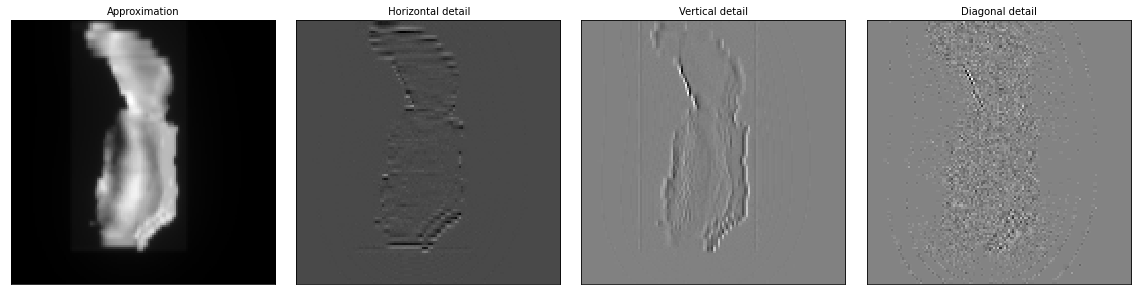

In [28]:
imagePath = os.path.join(ARG_SOURCE_PATH, image_filename)

# Load image
original = cv2.imread(imagePath) 
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
# coeffs2 = pywt.dwt2(original, 'bior1.3') # original example
coeffs2 = pywt.dwt2(original, 'coif1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(16, 4))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [8]:
# type of wavelets decomposition. See Wavelet settings at https://pyradiomics.readthedocs.io/en/latest/customization.html?highlight=wavelet#parameter-file
# https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html
print(pywt.families())
print(f'\n{pywt.families(short=False)}')
print(f'\n{pywt.wavelist()}')
print(f"\n{pywt.wavelist(family='coif')}")
print(f"\n{pywt.wavelist(kind='discrete')}")

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26'